<a href="https://colab.research.google.com/github/DiaaAlqadi/Classification-Project/blob/main/task_7_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('/content/advertising.csv')

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

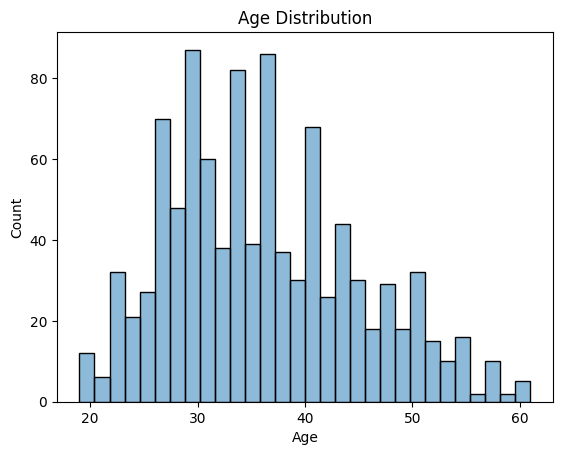

In [11]:
g=sns.histplot(data=ad_data,x='Age',alpha=0.5,bins=30)
g.set_title('Age Distribution')
plt.show()

**Create a jointplot showing Area Income versus Age.**

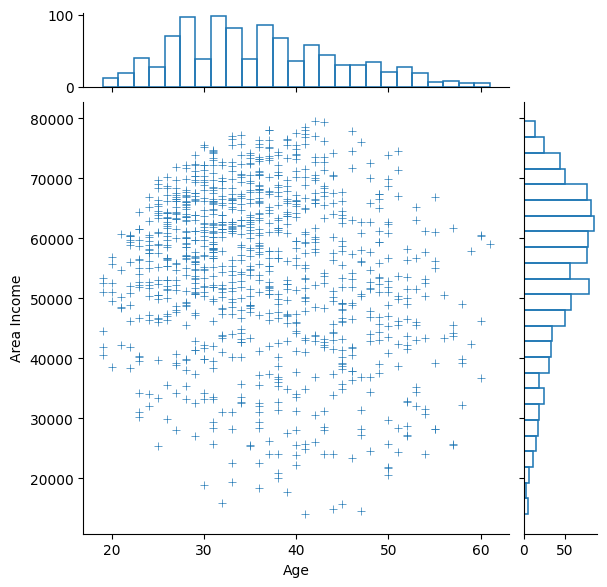

In [37]:
g=sns.jointplot(data=ad_data,x='Age',y='Area Income',marginal_ticks=True,marginal_kws=dict(bins=25, fill=False),marker='+')

plt.show()

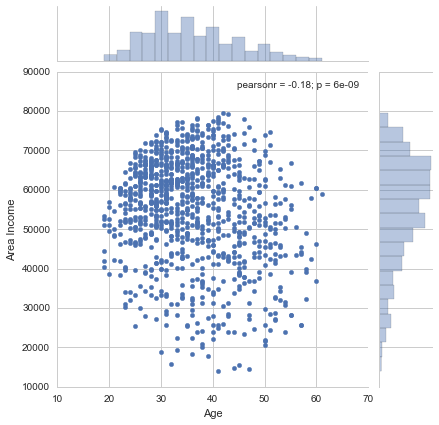

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

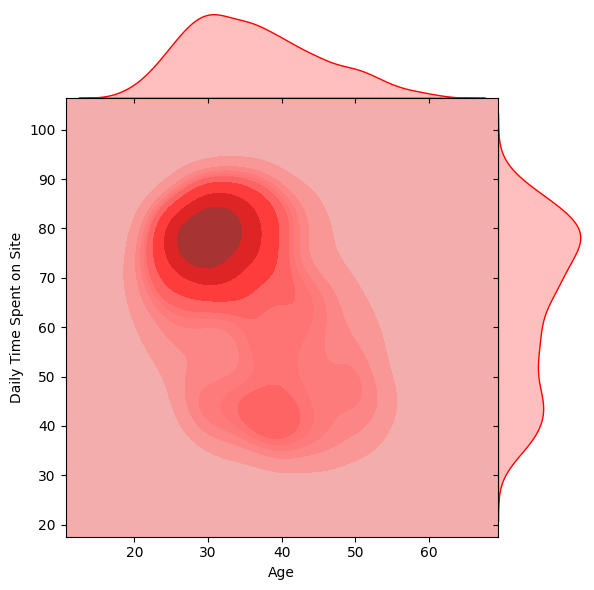

In [36]:
sns.jointplot(data=ad_data, x='Age',y= 'Daily Time Spent on Site',kind='kde',color='red',fill=True,thresh=0,space=0)
plt.show()

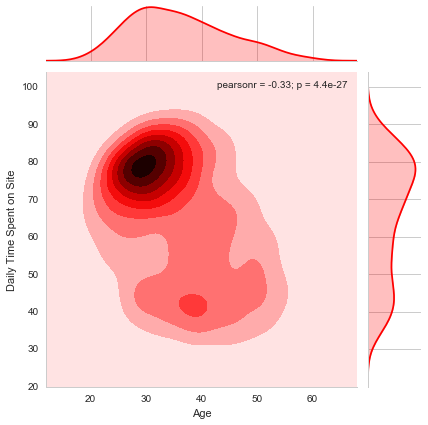

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

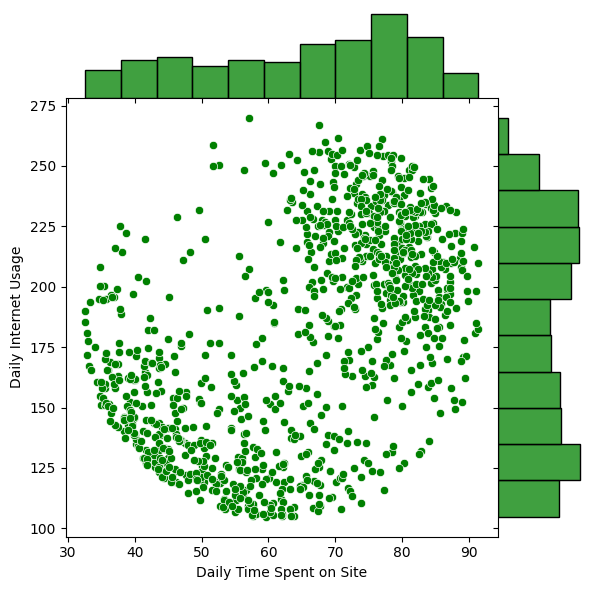

In [41]:
sns.jointplot(data=ad_data,x='Daily Time Spent on Site',y='Daily Internet Usage',space=0,color='g')
plt.show()

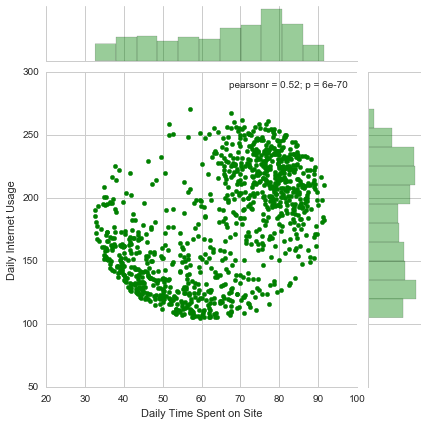

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

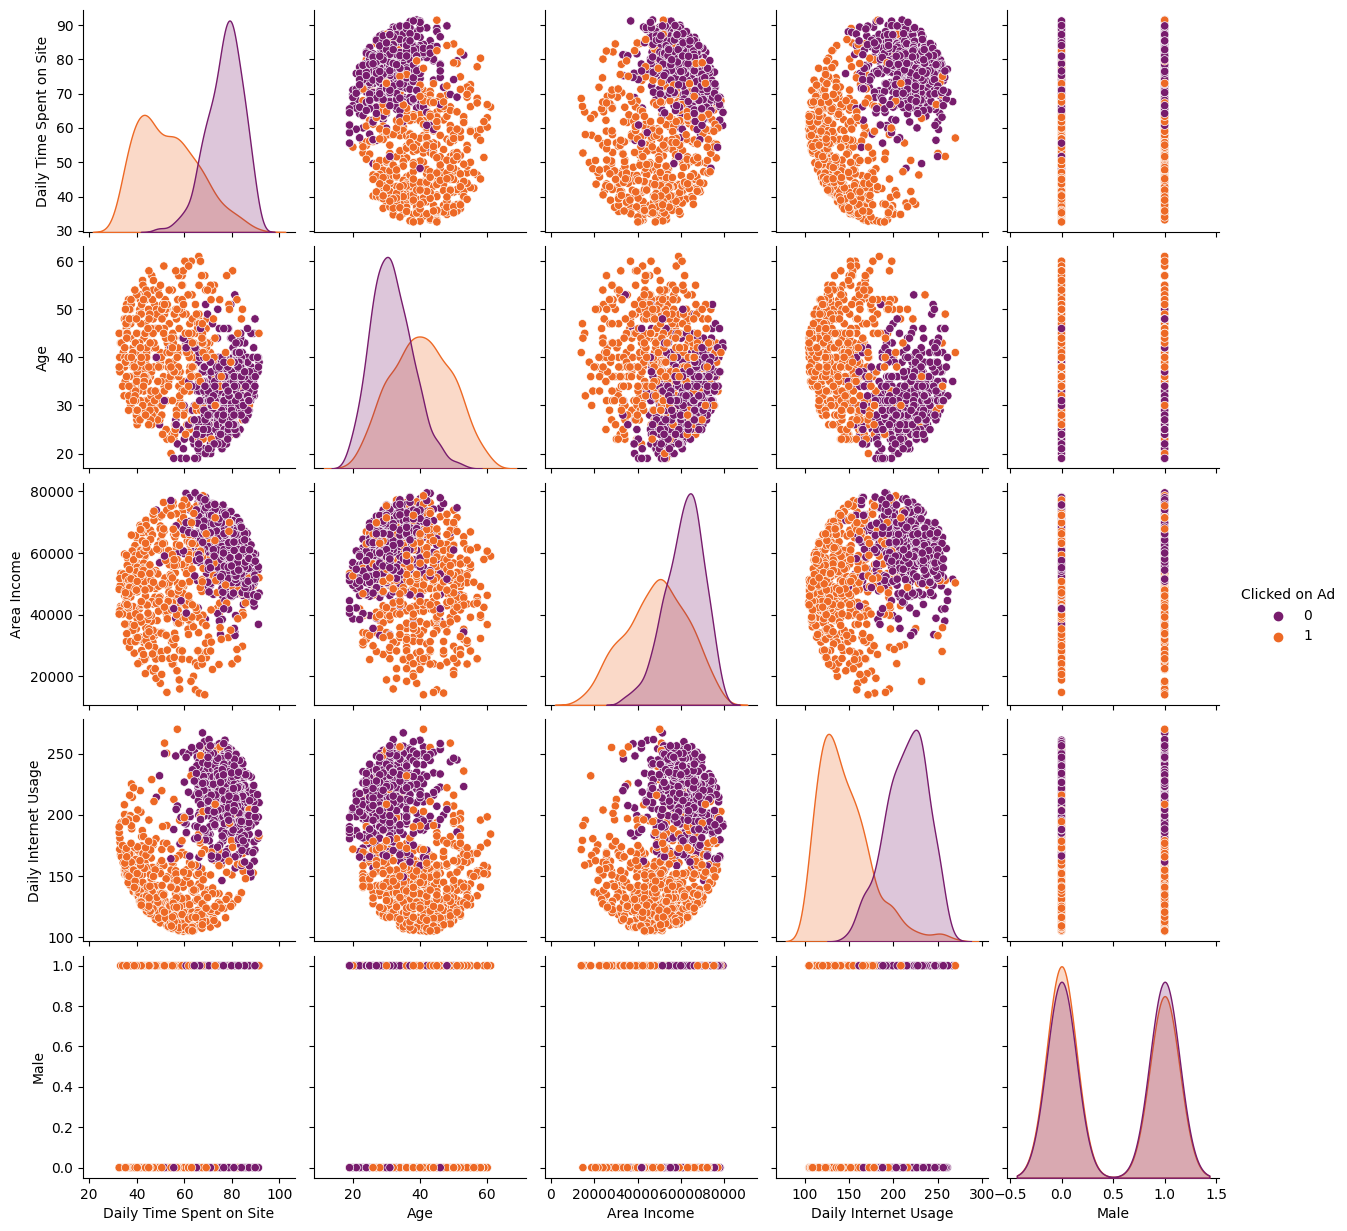

In [43]:
sns.pairplot(data=ad_data,hue='Clicked on Ad',palette='inferno')
plt.show()

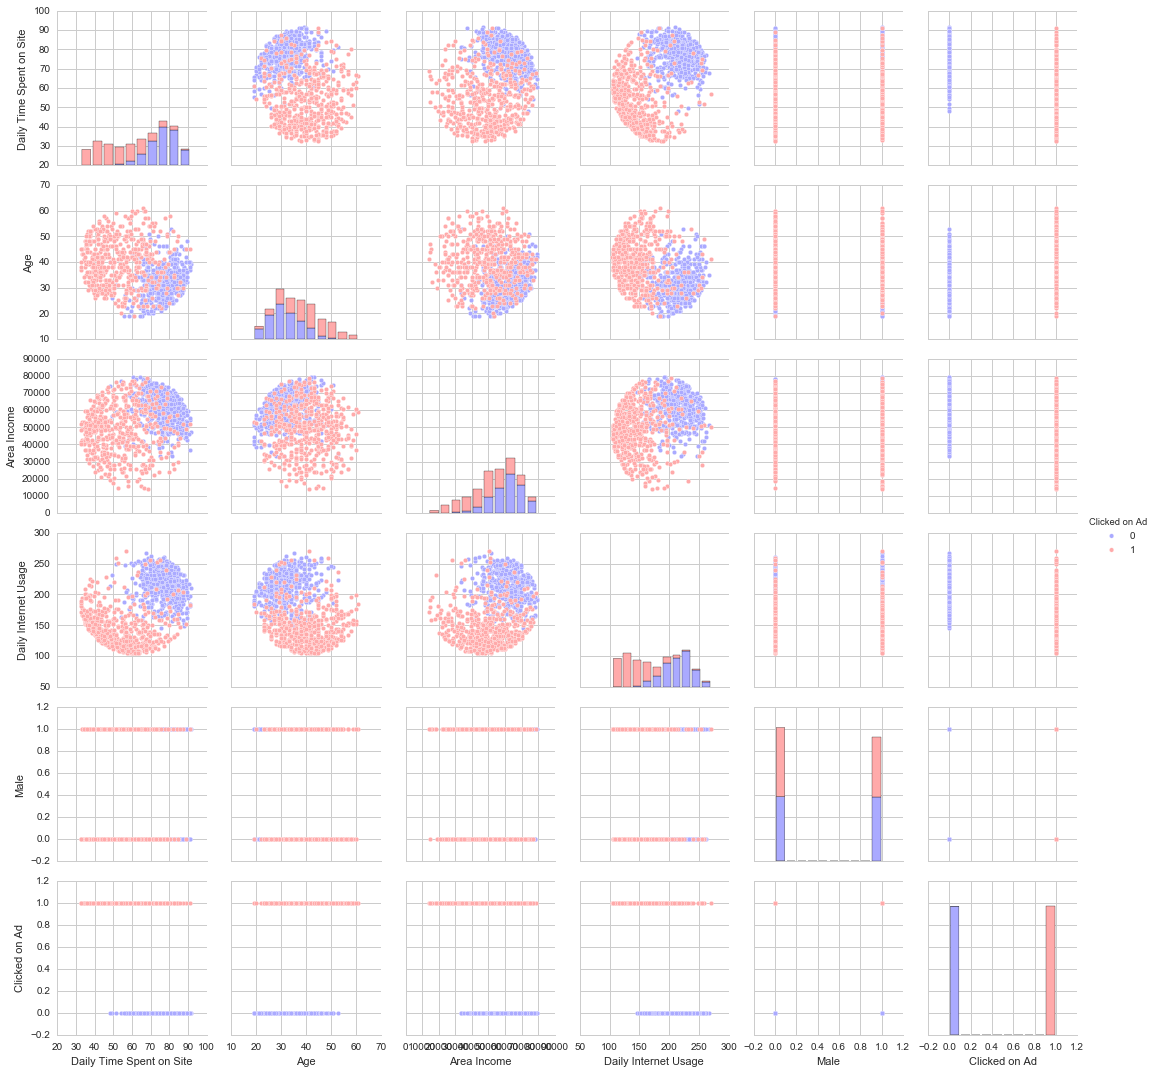

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [51]:
df_features=ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
df_target=ad_data['Clicked on Ad']


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(df_features,df_target,test_size=0.3,random_state=123721,stratify= df_target)

feature scaling

** Train and fit a logistic regression model on the training set.**

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr= LogisticRegression()

logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [78]:
lr.fit(x_train,y_train)

LogisticRegression()

In [79]:
yhat= lr.predict(x_train)

<ipython-input-80-2fb691ed03b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sns.distplot(y_train,kde=True,hist=False)
<ipython-input-80-2fb691ed03b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat,kde=True,hist=False,ax=g)


<Axes: xlabel='Clicked on Ad', ylabel='Density'>

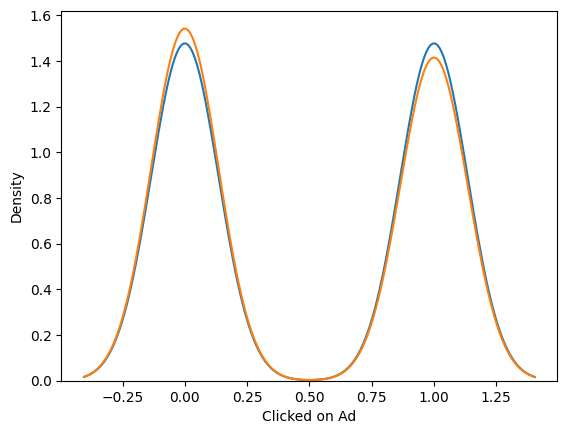

In [80]:
g=sns.distplot(y_train,kde=True,hist=False)
sns.distplot(yhat,kde=True,hist=False,ax=g)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [81]:
yhat_test=lr.predict(x_test)

** Create a Confusion Matrix for the model.**

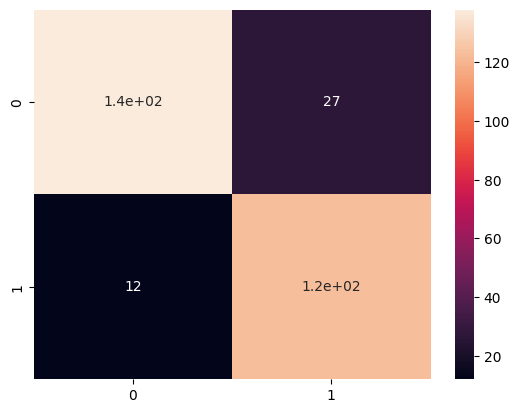

In [82]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(yhat_test,y_test),annot=True)
plt.show()

In [83]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_score(yhat_test,y_test)


0.87

In [84]:
precision_score(yhat_test,y_test)

0.82

## k-Nearest Neighbors

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:

knn = KNeighborsClassifier(n_neighbors=4)

In [87]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [88]:
yhat_test=knn.predict(x_test)

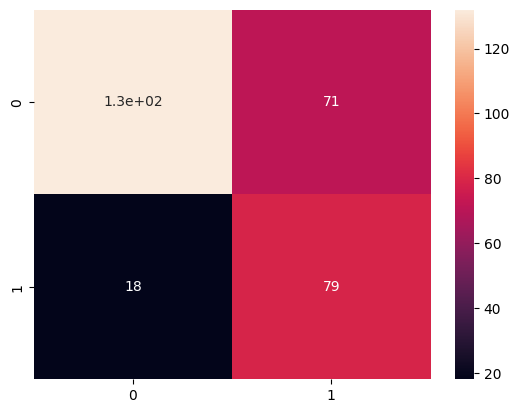

In [89]:
sns.heatmap(confusion_matrix(yhat_test,y_test),annot=True)
plt.show()

In [90]:
accuracy_score(yhat_test,y_test)

0.7033333333333334

In [91]:
precision_score(yhat_test,y_test)

0.5266666666666666

##random forest classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

yhat_test = tree.predict(x_test)

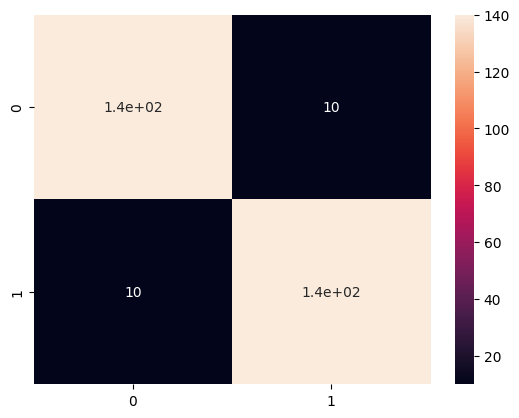

In [95]:
sns.heatmap(confusion_matrix(yhat_test,y_test),annot=True)
plt.show()

In [96]:
accuracy_score(yhat_test,y_test)

0.9333333333333333

In [97]:
precision_score(yhat_test,y_test)

0.9333333333333333

## Great Job!